# Find the pandas documentation under: https://pandas.pydata.org/

# Find a very helpful pandas cheat sheet under: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

### What did we do last time?

- basic Python syntax
- variables, operators and assignment
- basic data types and containers
- functions
- loops

In [1]:
# %
# // 
# **
# += 

In [2]:
# we looked at:
# - how to define a function, return statement
# - how to structure your code with tabs / spaces

def is_leap_year(year):
    """
    Check whether a year is a leap year or not
    :param year:
    :return bool:
    """
    if year % 400 == 0 or (year % 100 != 0) and (year % 4 == 0):
        print(f'{year} is a leap year')
        return True
    else:
        print(f'{year} is not a leap year')
        return False

# - how to create a for loop in Python
# - and call a function from each iteration of the loop

year_list = [2000, 2010, 2020, 2030, 2040, 2050]
for year in year_list:
    is_leap_year(year)

2000 is a leap year
2010 is not a leap year
2020 is a leap year
2030 is not a leap year
2040 is a leap year
2050 is not a leap year


## Another concept you should know: List comprehensions

In [3]:
nums = [1, 2, 3, 4, 5, 6, 20, 33, 100]
# simple list comprehension
res = [i for i in range(10)]

In [4]:
# running a function inside a list comprehension
res = [is_leap_year(i) for i in year_list]


2000 is a leap year
2010 is not a leap year
2020 is a leap year
2030 is not a leap year
2040 is a leap year
2050 is not a leap year


In [5]:
res

[True, False, True, False, True, False]

#### Write a function that determines if a number is even and apply it to each value in nums. 

In [6]:
# define the function is even
def is_even(num):
    return num % 2 == 0

In [7]:
# apply this function to each value in nums using a for loop
nums = [1, 2, 3, 4, 5, 6, 20, 33, 100]
for i in nums:
    print(is_even(i))

False
True
False
True
False
True
True
False
True


In [8]:
# apply this function to each value in nums using a list comprehension
[f'{is_even(i)} ist das Ergebenis für {i}' for i in nums]

['False ist das Ergebenis für 1',
 'True ist das Ergebenis für 2',
 'False ist das Ergebenis für 3',
 'True ist das Ergebenis für 4',
 'False ist das Ergebenis für 5',
 'True ist das Ergebenis für 6',
 'True ist das Ergebenis für 20',
 'False ist das Ergebenis für 33',
 'True ist das Ergebenis für 100']

#### More advanced list comprehension

In [9]:
# list comprehension with if 
# list comprehension with if else
[i if i < 50 else 0 for i in nums]

[1, 2, 3, 4, 5, 6, 20, 33, 0]

In [10]:
# dictionary comprehension
res = {num: is_even(num) for num in nums}
res

{1: False,
 2: True,
 3: False,
 4: True,
 5: False,
 6: True,
 20: True,
 33: False,
 100: True}

# Starting with Pandas

### Import packages (numpy, matplotlib and pandas)

- Importing a package brings it into the "namespace" of your current script
- this means you can access its functions as if you defined them previuosly yourself
- the **as** keyword allows you to give a package a self-chosen name
- for pandas __pd__ is usually used, for numpy we use __np__ and for matplotlib __plt__

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### If a package is not installed on your computer / your current environment you can install it using pip install "package"
#### In Jupyter we can add a ! before pip, to install directly from the notebook. This will also work in Google Colab!

# 1. Read the csv file Messwert_2015.csv and see what the file looks like

Making use of the Pandas documentation https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv
We can create a simple but very powerful query to get the data from the CSV.

We just learned that we can acces pandas functions after import the pandas module as pd by calling:
__pd.some_function()__

FYI, you can also open a CSV in Jupyter by navigating to it through the sidebar and double clicking it.

In [12]:
def convert_str_float(x: str):
    x = float(x.replace(',', '.'))
    return x

#convert_str_float('279,5')


df = pd.read_csv('Input/Messwertexport_2015.csv', sep=';', 
                 decimal=',',
                 #converters={'Wert': convert_str_float},
                 parse_dates={'datetime':['[kW]','Attribut']})
# Try the following arguments to the pd.read_csv() function
# sep: str
# decimal: str
# usecols: list
# dtype: dict
# converters: dict
# parse_dates: bool / list / dict

### Reload the dataframe without our custom converter function

In [13]:
# convert Wert column to float using astype()
# dropna()
# fillna()
# isna()

#### Our data is now in a pandas DataFrame format

The primary pandas data structure.

A DataFrame is a data structure with labeled axes (rows and columns).

Arithmetic operations align on both row and column labels.

" Excel for Python "

[DataFrame documentation](https://pandas.pydata.org/docs/reference/frame.html)

# 2. Check out some basic functions of pd.DataFrames

In [14]:
df.iloc[df['Wert'].idxmax()]

datetime    07.08.2015 14:00
Wert                   846.0
Name: 20983, dtype: object

In [15]:
# transpose
# head()
#df.head(9)
# whats the difference between loc and iloc?
# columns
# rows
# len()
# size / shape
# unique()
# sum()
# min(), max()
# idxmin(), idxmax()

# info()
# describe()

In [16]:
# Whats the difference between size and shape?
# Why do i have to put () behind head, tail, etc. but not behind shape, columns etc.?
# Advanced: Why does loc use square brackets?

### Use the iloc function to get the 107th row of the dataframe

In [17]:
df.iloc[106, :]

datetime    02.01.2015 02:45
Wert                   268.0
Name: 106, dtype: object

### Use the iloc function to get the thrid from last row of the dataframe

In [18]:
df.iloc[-3, :]

datetime    31.12.2015 23:30
Wert                   206.0
Name: 35041, dtype: object

### Use the .unique() function to tell the number of unique entries in the column 'Wert'

In [19]:
len(df.Wert.unique())

343

### Whats the sum of all values in the dataframe?

In [20]:
df.Wert.sum()

13564575.0

### Whats are the maximum and minimum value?

In [21]:
df.describe()

,Wert
count,35044.00000
mean,387.07268
std,123.53839
min,0.00000
25%,286.00000
50%,334.00000
75%,502.00000
max,846.00000


### Whats the sum of the rows [200 - 300] (inclusive)

In [22]:
df.loc[200:301].Wert.sum()

28794.0

### When we access just one column of a Dataframe, pandas returns a **Series**

A pd.Series is a one-dimensional Array with labels. Its like one column or row of a DataFrame.
[pd.Series documentation](https://pandas.pydata.org/docs/reference/series.html)

We can pretty much do the same things we do with DataFrames with Series as well.

In [23]:
type(df.Wert)

pandas.core.series.Series

# 2. Filter DataFrame for the following criteria

* values >= 500, 800, 900

* datetime >= July

In [24]:
df[df.Wert >= 500]

,datetime,Wert
417,05.01.2015 08:30,504.0
419,05.01.2015 09:00,524.0
420,05.01.2015 09:15,538.0
421,05.01.2015 09:30,532.0
422,05.01.2015 09:45,548.0
...,...,...
34130,22.12.2015 11:45,544.0
34135,22.12.2015 13:00,512.0
34138,22.12.2015 13:45,506.0
34139,22.12.2015 14:00,508.0


#### First we set our index to use the datetime format

In [25]:
df.set_index(pd.DatetimeIndex(df.datetime), inplace=True)
df = df.Wert  # drop the now unused datetime column

In [26]:
df[df.index.month >= 7]

datetime
2015-07-01 00:15:00    276.0
2015-07-01 00:30:00    258.0
2015-07-01 00:45:00    274.0
2015-07-01 01:00:00    278.0
2015-07-01 01:15:00    246.0
                       ...  
2015-12-31 23:00:00    204.0
2015-12-31 23:15:00    220.0
2015-12-31 23:30:00    206.0
2015-12-31 23:45:00    224.0
2015-12-31 00:00:00    208.0
Name: Wert, Length: 17668, dtype: float64

### Try to filter the DataFrame for your birthday!

In [27]:
df[(df.index.day == 6) & (df.index.month == 4)]

datetime
2015-04-06 00:15:00    340.0
2015-04-06 00:30:00    282.0
2015-04-06 00:45:00    308.0
2015-04-06 01:00:00    316.0
2015-04-06 01:15:00    290.0
                       ...  
2015-04-06 23:00:00    372.0
2015-04-06 23:15:00    310.0
2015-04-06 23:30:00    316.0
2015-04-06 23:45:00    332.0
2015-04-06 00:00:00    288.0
Name: Wert, Length: 96, dtype: float64

In [28]:
# whats the sum for that day? / the mean, min & max?
df[(df.index.day == 6) & (df.index.month == 4)].sum()

42492.0

In [29]:
# .str.lower()
# .str.contains()
# .str.split()
# .str.get()
# .str.replace()

The replace() method also works for non string data and can be used like so:

In [30]:
# replace({})

# 3. Let's Try some basic plotting of timeseries data

<Axes: xlabel='datetime'>

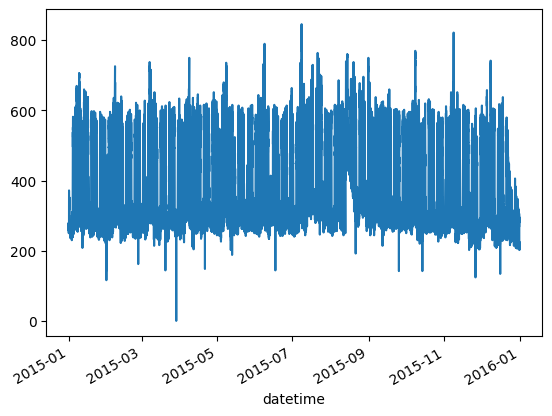

In [31]:
# plot with DatetimeIndex
df.plot()

<Axes: xlabel='datetime'>

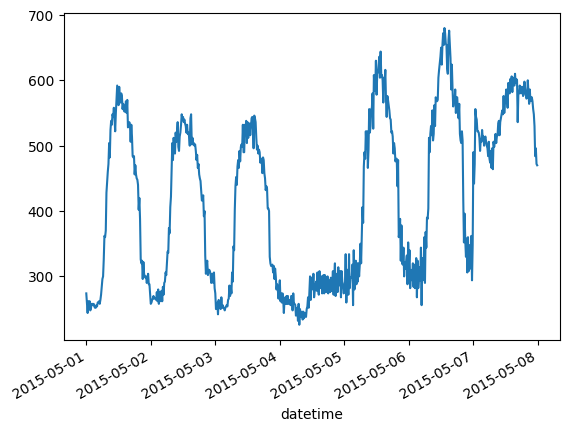

In [32]:
# plot with DatetimeIndex for just first week in May
df[(df.index.month == 5) & (df.index.day < 8)].plot()

# 4. Resampling timeseries data

### Explore the .resample() function to resample your dataframe

In [33]:
df.resample('H').sum()

datetime
2015-01-01 00:00:00    1086.0
2015-01-01 01:00:00    1066.0
2015-01-01 02:00:00    1054.0
2015-01-01 03:00:00    1066.0
2015-01-01 04:00:00    1076.0
                        ...  
2015-12-31 19:00:00     950.0
2015-12-31 20:00:00     864.0
2015-12-31 21:00:00     866.0
2015-12-31 22:00:00     850.0
2015-12-31 23:00:00     854.0
Freq: H, Name: Wert, Length: 8760, dtype: float64

In [34]:
df.resample('D').max()

datetime
2015-01-01    372.0
2015-01-02    280.0
2015-01-03    310.0
2015-01-04    582.0
2015-01-05    400.0
              ...  
2015-12-27    298.0
2015-12-28    406.0
2015-12-29    356.0
2015-12-30    348.0
2015-12-31    318.0
Freq: D, Name: Wert, Length: 365, dtype: float64

### Make a plot of the daily mean values

<Axes: xlabel='datetime'>

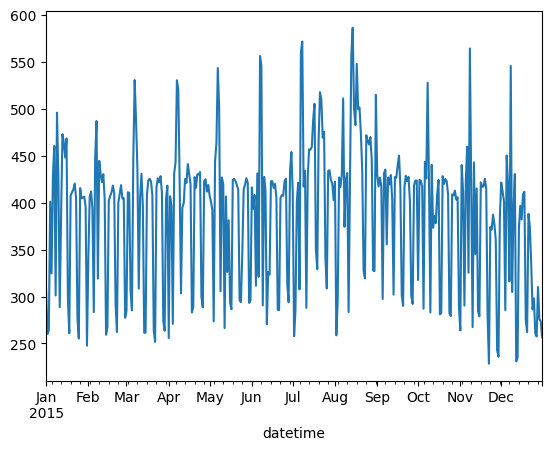

In [35]:
df.resample('D').mean().plot()

# 5. Evaluation of the electricity consumption

    - calculate monthly demand in day (8:00-20:00) except for weekends
    - calculate monthly demand in night (20:00-8:00) plus weekends

### Apply what you learned!
* Use .index.hour and .index.weekday to filter your data for the daily electricity consumption.
* Calculate the total monthly electricity consumption during daytime.

In [36]:
daytime_demand = df[(df.index.hour.isin(range(8,20))) & (df.index.weekday.isin(range(5)))]
daytime_demand.resample('M').sum()

datetime
2015-01-31    526230.0
2015-02-28    490712.0
2015-03-31    523064.0
2015-04-30    541342.0
2015-05-31    494304.0
2015-06-30    526308.0
2015-07-31    594520.0
2015-08-31    551092.0
2015-09-30    544916.0
2015-10-31    531096.0
2015-11-30    493950.0
2015-12-31    479740.0
Freq: M, Name: Wert, dtype: float64

### Follow the same process for night time

In [37]:
# we can use ~ to get the opposite. in this case it means we get the hours that are not between 8 and 20.
nighttime_demand = df[~(df.index.hour.isin(range(8,20))) & (df.index.weekday.isin([5,6]))]
nighttime_demand.resample('M').sum()

datetime
2015-01-31    119940.0
2015-02-28    109002.0
2015-03-31    124568.0
2015-04-30    109534.0
2015-05-31    142498.0
2015-06-30    124936.0
2015-07-31    121060.0
2015-08-31    166612.0
2015-09-30    113352.0
2015-10-31    128926.0
2015-11-30    120086.0
2015-12-31    103822.0
Freq: M, Name: Wert, dtype: float64

### Plot daytime and nighttime daily sums in the same plot

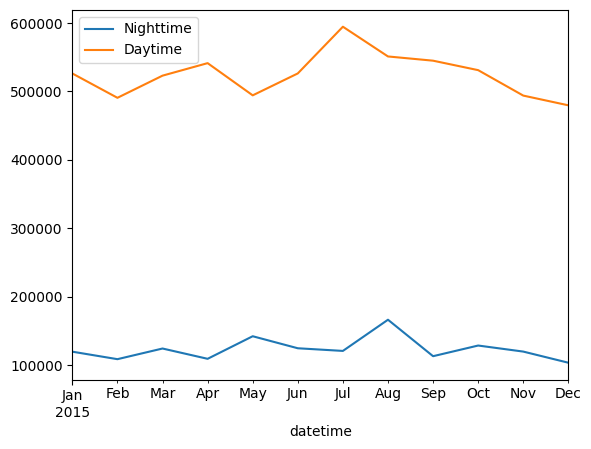

In [38]:
fig, ax = plt.subplots()
nighttime_demand.resample('M').sum().plot(ax=ax, label='Nighttime')
daytime_demand.resample('M').sum().plot(ax=ax, label='Daytime')
plt.legend()
plt.show()

# Here is an example of more complicated plotting options to present timeseries data, that you can use for your future timeseries representations!

In [39]:
# some additional matplotlib tools
import matplotlib.colors as mc
from matplotlib.cm import ScalarMappable


def ts_heatmap(ts, cmap='magma', darkmode=False, unit='', title='', maximum=None):
    """Plot a heatmap of a timeseries data.
    Only works if the dataset has 8760 hours.
    And your data should be all positive values."""
    ts.reset_index(inplace=True, drop=True)
    assert(len(ts)==8760)
    # subdivide the data into bins for each month
    bins=[]
    first, last = 0, 0
    for days in [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]:
        last += days
        bins.append(ts[first*24:last*24])
        first += days
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    if maximum is None:
        maximum = ts.max()
    def single_plot(data, month, ax):
        """Plot for one month"""
        xgrid = np.arange(len(data[0]) + 1) + 1
        ygrid = np.arange(25)
        ax.pcolormesh(xgrid, ygrid, data, cmap=cmap, vmin=0, vmax=maximum)
        # invert vertical axis
        ax.set_ylim(24, 0)
        # Set tick positions for both axes
        ax.yaxis.set_ticks([6, 12, 18, 24])
        ax.xaxis.set_ticks([10, 20, 30])
        # Remove ticks by setting their length to 0
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.set_xlabel(month)
        # Remove all spines
        ax.set_frame_on(False)
    if darkmode:
        style='dark_background'
    else:
        style='default'
    plt.style.use(style)
    plt.rcParams.update({'font.size': 9})
    fig, axes = plt.subplots(1, 12, figsize=(12, 4), sharey=True)
    for i, b in enumerate(bins):
        # Re-arrange temperature values
        temp = b.values.reshape(24, len(b)//24, order="F")
        # Create the plots for each month
        single_plot(temp, months[i], axes[i])
    fig.suptitle(title)
    # Adjust margin and space between subplots
    # Extra space is on the left to add a label
    fig.subplots_adjust(left=.05, right=.98, top=.9, hspace=.08, wspace=.04)
    # Make some room for the legend in the bottom.
    fig.subplots_adjust(bottom=0.2)
    # Create a new axis to contain the color bar
    # Values are:
    # (x coordinate of left border,
    #  y coordinate for bottom border,
    #  width,
    #  height)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.025])
    # Create a normalizer that goes from minimum to maximum value
    norm = mc.Normalize(0, maximum)
    # Create the colorbar and set it to horizontal
    cb = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap),
        cax=cbar_ax, # Pass the new axis
        orientation = "horizontal"
    )
    cb.ax.xaxis.set_tick_params(size=0)
    cb.set_label(f"Demand {unit}")
    plt.show()

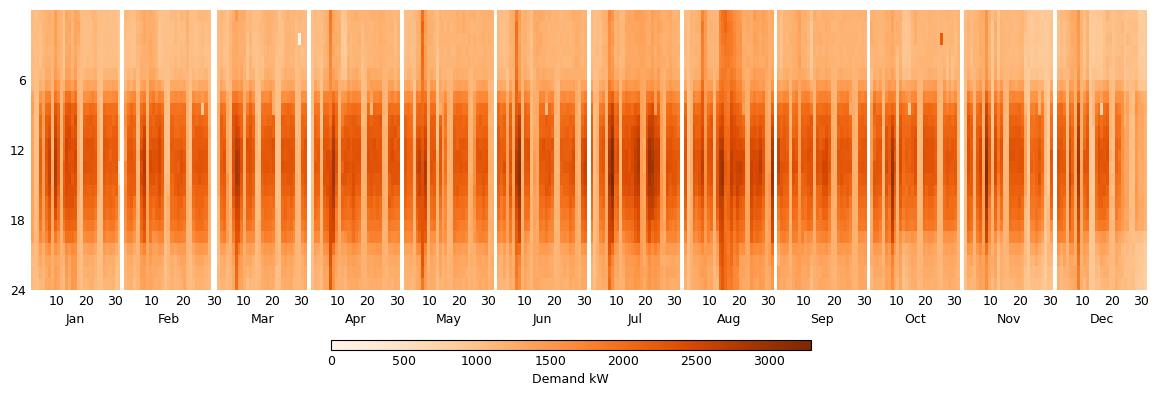

In [40]:
ts_heatmap(df.resample('H').sum(), cmap='Oranges', unit='kW')

## Also find some amazing plots you can create with Python here:

[Python Graph Gallery](https://python-graph-gallery.com)